In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import string
import re
import demoji
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, SpatialDropout1D, Dropout, BatchNormalization, Flatten
from keras.regularizers import l2
from keras.optimizers import Adam

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer

#model selection
#from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
dataset = pd.read_csv("D:\Projects\Hate Speech Detection\cyberbullying_data.csv")
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [85]:
dataset = dataset[['class', 'tweet']]
y = dataset['class']

In [86]:
dataset.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [87]:
dataset["tweet"] = dataset["tweet"].astype(str)

In [88]:
import string

print(string.punctuation)
def remove_punctuation(tweet):
    punctuationfree="".join([i for i in tweet if i not in string.punctuation])
    return punctuationfree

dataset['tweet']= dataset['tweet'].apply(lambda x:remove_punctuation(x))
dataset.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,class,tweet
0,2,RT mayasolovely As a woman you shouldnt compl...
1,1,RT mleew17 boy dats coldtyga dwn bad for cuff...
2,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,1,RT CGAnderson vivabased she look like a tranny
4,1,RT ShenikaRoberts The shit you hear about me ...


In [89]:
dataset['tweet']= dataset['tweet'].apply(lambda x: x.lower())
dataset.head()

,class,tweet
0,2,rt mayasolovely as a woman you shouldnt compl...
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,1,rt cganderson vivabased she look like a tranny
4,1,rt shenikaroberts the shit you hear about me ...


In [90]:
def tokenization(tweet):
    tokens = re.split('W+',tweet)
    return tokens

dataset['tweet']= dataset['tweet'].apply(lambda x: tokenization(x))
dataset.head()

,class,tweet
0,2,[ rt mayasolovely as a woman you shouldnt comp...
1,1,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,1,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,1,[ rt cganderson vivabased she look like a tranny]
4,1,[ rt shenikaroberts the shit you hear about me...


In [91]:
vocab_size = len(dataset['tweet']) + 1 
vocab_size

24784

In [92]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[0:10])

def remove_stopwords(Tweet):
    output= [i for i in Tweet if i not in stopwords]
    return output

dataset['tweet']= dataset['tweet'].apply(lambda x:remove_stopwords(x))
dataset.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


,class,tweet
0,2,[ rt mayasolovely as a woman you shouldnt comp...
1,1,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,1,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,1,[ rt cganderson vivabased she look like a tranny]
4,1,[ rt shenikaroberts the shit you hear about me...


In [93]:
porter_stemmer = PorterStemmer()

def stemming(Tweet):
    stem_Tweet = [porter_stemmer.stem(word) for word in Tweet]
    return stem_Tweet

dataset['tweet']=dataset['tweet'].apply(lambda x: stemming(x))
dataset.head()

,class,tweet
0,2,[ rt mayasolovely as a woman you shouldnt comp...
1,1,[ rt mleew17 boy dats coldtyga dwn bad for cuf...
2,1,[ rt urkindofbrand dawg rt 80sbaby4life you ev...
3,1,[ rt cganderson vivabased she look like a tranni]
4,1,[ rt shenikaroberts the shit you hear about me...


In [94]:
def get_sentence(words):
    sentence = ' '.join(words)
    return sentence

dataset['tweet']=dataset['tweet'].apply(lambda x: get_sentence(x))
dataset.head()

,class,tweet
0,2,rt mayasolovely as a woman you shouldnt compl...
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,1,rt cganderson vivabased she look like a tranni
4,1,rt shenikaroberts the shit you hear about me ...


In [95]:
def remove_emoji(tweet):
    dem = demoji.findall(tweet)
    for item in dem.keys():
        tweet = tweet.replace(item, '')
    return tweet

dataset['tweet']= dataset['tweet'].apply(lambda x: remove_emoji(x))
dataset.head()

,class,tweet
0,2,rt mayasolovely as a woman you shouldnt compl...
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,1,rt cganderson vivabased she look like a tranni
4,1,rt shenikaroberts the shit you hear about me ...


# 0 - Hate speech
# 1 - Offensive language
# 2 - Neither

In [96]:
X=dataset['tweet']
Y=dataset['class']

C:\Users\anand\AppData\Local\Temp\ipykernel_15728\4137342103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


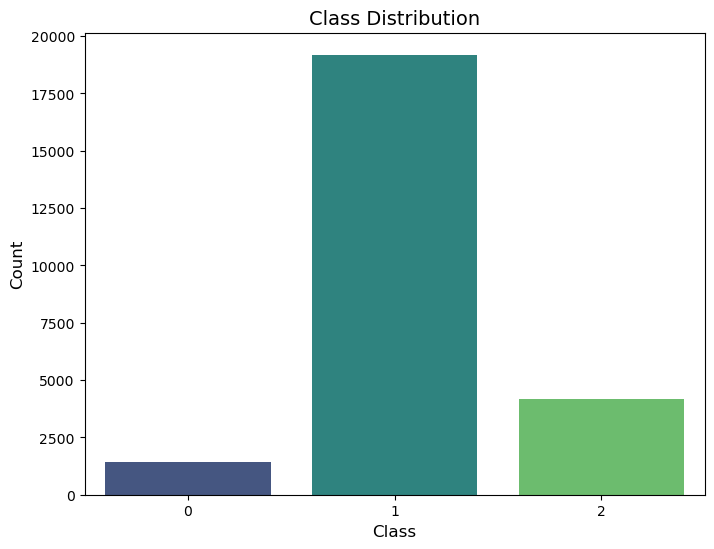

In [97]:
# Count the occurrences of each class
class_counts = dataset['class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution', fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [127]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd



# Optional: Convert text data into numerical features (e.g., using CountVectorizer or TfidfVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution before SMOTE:", y_train.value_counts().to_dict())
print("Class distribution after SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())


Class distribution before SMOTE: {1: 15358, 2: 3328, 0: 1140}
Class distribution after SMOTE: {0: 15358, 2: 15358, 1: 15358}


In [ ]:
dataset['class'].shape

C:\Users\anand\AppData\Local\Temp\ipykernel_15728\1999765423.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="viridis")


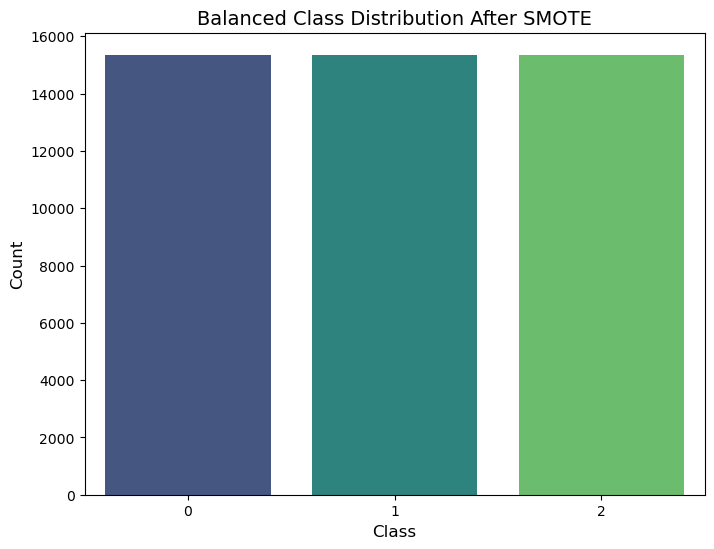

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check class distribution after SMOTE
balanced_class_counts = pd.Series(y_train_resampled).value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Balanced Class Distribution After SMOTE', fontsize=14)
plt.xticks(rotation=0)
plt.show()


In [38]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=0)

In [130]:
X_train_resampled.shape, y_train_resampled.shape

((46074, 41489), (46074,))

In [39]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(f'Accuracy : {score*100:.2f}')

Accuracy : 86.08


In [40]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.30      0.38      0.33       290
           1       0.94      0.90      0.92      3832
           2       0.78      0.86      0.82       835

    accuracy                           0.86      4957
   macro avg       0.67      0.71      0.69      4957
weighted avg       0.87      0.86      0.87      4957



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Initialize a dictionary to store results
results = {}

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}

# Random Forest Classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}

# Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}

# Support Vector Machine (SVM)
clf = SVC(kernel='linear', random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}

# K-Nearest Neighbors (KNN)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}

# Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}

# Print Results
for classifier, metrics in results.items():
    print(f"\n{classifier}:\n")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Decision Tree:

Accuracy: 0.8608029049828525
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.38      0.33       290
           1       0.94      0.90      0.92      3832
           2       0.78      0.86      0.82       835

    accuracy                           0.86      4957
   macro avg       0.67      0.71      0.69      4957
weighted avg       0.87      0.86      0.87      4957


Random Forest:

Accuracy: 0.8686705668751261
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.15      0.23       290
           1       0.89      0.96      0.92      3832
           2       0.81      0.68      0.74       835

    accuracy                           0.87      4957
   macro avg       0.74      0.60      0.63      4957
weighted avg       0.85      0.87      0.85      4957


Logistic Regression:

Accuracy: 0.8710913859189026
Classification Report:
              precision  

In [146]:
n_off, n_none, n_hate = dataset['class'].value_counts()
n_hate, n_off, n_none 

(1430, 19190, 4163)

In [147]:
df_hate = dataset[dataset['class'] == 0]
df_off = dataset[dataset['class'] == 1]
df_none = dataset[dataset['class'] == 2]

In [148]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=0)
df_none_over = df_none.sample(n_off, replace=True, random_state=0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)
print('Random over-sampling:')
print(df_over['class'].value_counts())

Random over-sampling:
class
1    19190
0    19190
2    19190
Name: count, dtype: int64


In [149]:
df_over['class'].unique()

array([1, 0, 2], dtype=int64)

In [150]:
df_over.head()

,class,tweet
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,1,rt cganderson vivabased she look like a tranni
4,1,rt shenikaroberts the shit you hear about me ...
5,1,tmadisonx the shit just blows meclaim you so f...


In [151]:
x=df_over['tweet']
y=df_over['class']

In [152]:
x.shape, y.shape

((57570,), (57570,))

In [153]:
from sklearn.model_selection import train_test_split
import pandas as pd



# Optional: Convert text data into numerical features (e.g., using CountVectorizer or TfidfVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(x)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_train)
X_test = vectorizer.fit_transform(X_test)

In [155]:
X_vectorized.shape

(46056, 37205)

In [156]:
y_train.shape

(46056,)

In [157]:
clf = MultinomialNB()
clf.fit(X_vectorized, y_train)

MultinomialNB()

In [158]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_train)
print(f'Accuracy : {score*100:.2f}')

ValueError: X has 19616 features, but MultinomialNB is expecting 37205 features as input.